# Stock Liability Driven Investment (LDI) Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01' #input
end = '2023-03-01' #input
symbol = 'LT.NS' #input

In [3]:
stocks = yf.download(symbol, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
stocks_returns = stocks.pct_change().dropna()

In [5]:
def lpm(stock_returns):
    threshold=0.0
    order=1
    threshold_array = np.empty(len(stock_returns))
    threshold_array.fill(threshold)
    diff = threshold_array - stock_returns
    diff = diff.clip()
    return np.sum(diff ** order) / len(stock_returns)

Text(0, 0.5, 'Lower Partial Moment')

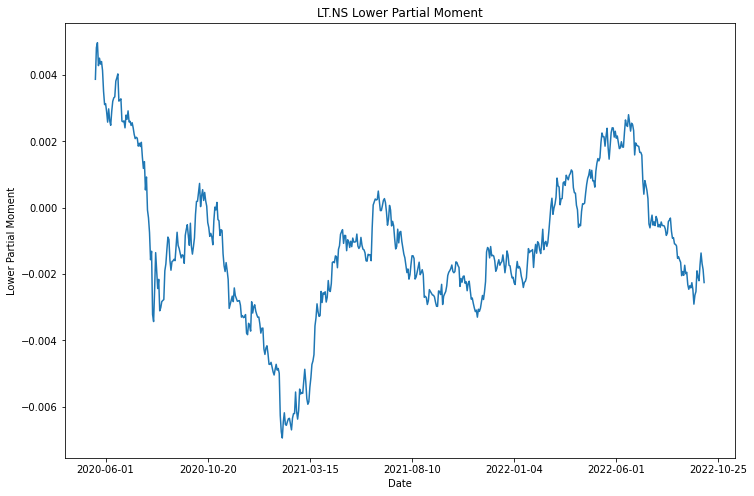

In [6]:
# Compute the running Lower Partial Moment
running = [lpm(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Lower Partial Moment up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Lower Partial Moment')
plt.xlabel('Date')
plt.ylabel('Lower Partial Moment')

In [7]:
stock_lpm = lpm(stocks_returns)
stock_lpm

-0.0008793124448777505

In [8]:
running = [lpm(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]
running

[0.0038718755833610234,
 0.004827923807063609,
 0.004975501352107092,
 0.0042839299576806125,
 0.004508520713381615,
 0.004329929354560844,
 0.004407386684147061,
 0.0041382097034393436,
 0.003509265635471433,
 0.0031094312398959015,
 0.003137349151226639,
 0.0028941519195886376,
 0.002580706767101959,
 0.0029803998049131573,
 0.002625799510315559,
 0.0024853122096861464,
 0.002905455300629287,
 0.003208470226110369,
 0.003310808172503853,
 0.0033431063107709196,
 0.003818122110215892,
 0.003914617111152962,
 0.0040345628549186465,
 0.003215093892971917,
 0.0032399282680033313,
 0.003282911801570381,
 0.002610451069576902,
 0.0025919720559340925,
 0.002619557873064714,
 0.0024083618536906177,
 0.0027937736798496512,
 0.0026668838287705102,
 0.0029196596775225383,
 0.0025870454952462243,
 0.0026055987655135182,
 0.002481062797927997,
 0.0025629004015164424,
 0.002409232904033476,
 0.002209875260499709,
 0.0020839585972633823,
 0.00212429781497733,
 0.0020975549799565965,
 0.001856729139